In [1]:
#Run the new window deformation

In [2]:
from openpiv import windef
from openpiv import tools, scaling, validation, filters, preprocess
import openpiv.pyprocess as process
from openpiv import pyprocess
from openpiv import widim
import numpy as np
import os
from time import time
import warnings


import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
settings = windef.Settings()


'Data related settings'
# Folder with the images to process
settings.filepath_images = '../test1/'
# Folder for the outputs
settings.save_path = '../test1/'
# Root name of the output Folder for Result Files
settings.save_folder_suffix = 'Test_1'
# Format and Image Sequence
settings.frame_pattern_a = 'exp1_001_a.bmp'
settings.frame_pattern_b = 'exp1_001_b.bmp'

'Region of interest'
# (50,300,50,300) #Region of interest: (xmin,xmax,ymin,ymax) or 'full' for full image
settings.ROI = 'full'

'Image preprocessing'
# 'None' for no masking, 'edges' for edges masking, 'intensity' for intensity masking
# WARNING: This part is under development so better not to use MASKS
settings.dynamic_masking_method = 'None'
settings.dynamic_masking_threshold = 0.005
settings.dynamic_masking_filter_size = 7

settings.deformation_method = 'symmetric'

'Processing Parameters'
settings.correlation_method='circular'  # 'circular' or 'linear'
settings.iterations = 2  # select the number of PIV passes
# add the interroagtion window size for each pass. 
# For the moment, it should be a power of 2 
settings.windowsizes = (64, 32, 16) # if longer than n iteration the rest is ignored
# The overlap of the interroagtion window for each pass.
settings.overlap = (32, 16, 8) # This is 50% overlap
# Has to be a value with base two. In general window size/2 is a good choice.
# methode used for subpixel interpolation: 'gaussian','centroid','parabolic'
settings.subpixel_method = 'gaussian'
# order of the image interpolation for the window deformation
settings.interpolation_order = 3
settings.scaling_factor = 1  # scaling factor pixel/meter
settings.dt = 1  # time between to frames (in seconds)
'Signal to noise ratio options (only for the last pass)'
# It is possible to decide if the S/N should be computed (for the last pass) or not
settings.extract_sig2noise = True  # 'True' or 'False' (only for the last pass)
# method used to calculate the signal to noise ratio 'peak2peak' or 'peak2mean'
settings.sig2noise_method = 'peak2peak'
# select the width of the masked to masked out pixels next to the main peak
settings.sig2noise_mask = 2
# If extract_sig2noise==False the values in the signal to noise ratio
# output column are set to NaN
'vector validation options'
# choose if you want to do validation of the first pass: True or False
settings.validation_first_pass = True
# only effecting the first pass of the interrogation the following passes
# in the multipass will be validated
'Validation Parameters'
# The validation is done at each iteration based on three filters.
# The first filter is based on the min/max ranges. Observe that these values are defined in
# terms of minimum and maximum displacement in pixel/frames.
settings.MinMax_U_disp = (-30, 30)
settings.MinMax_V_disp = (-30, 30)
# The second filter is based on the global STD threshold
settings.std_threshold = 7  # threshold of the std validation
# The third filter is the median test (not normalized at the moment)
settings.median_threshold = 3  # threshold of the median validation
# On the last iteration, an additional validation can be done based on the S/N.
settings.median_size=1 #defines the size of the local median
'Validation based on the signal to noise ratio'
# Note: only available when extract_sig2noise==True and only for the last
# pass of the interrogation
# Enable the signal to noise ratio validation. Options: True or False
settings.do_sig2noise_validation = False # This is time consuming
# minmum signal to noise ratio that is need for a valid vector
settings.sig2noise_threshold = 1.2
'Outlier replacement or Smoothing options'
# Replacment options for vectors which are masked as invalid by the validation
settings.replace_vectors = True # Enable the replacment. Chosse: True or False
settings.smoothn=True #Enables smoothing of the displacemenet field
settings.smoothn_p=0.5 # This is a smoothing parameter
# select a method to replace the outliers: 'localmean', 'disk', 'distance'
settings.filter_method = 'localmean'
# maximum iterations performed to replace the outliers
settings.max_filter_iteration = 4
settings.filter_kernel_size = 2  # kernel size for the localmean method
'Output options'
# Select if you want to save the plotted vectorfield: True or False
settings.save_plot = False
# Choose wether you want to see the vectorfield or not :True or False
settings.show_plot = True
settings.scale_plot = 200  # select a value to scale the quiver plot of the vectorfield
# run the script with the given settings

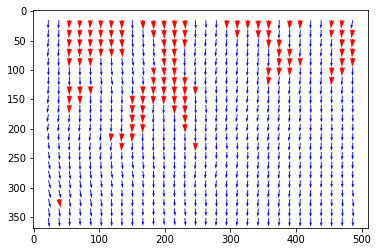

Image Pair 1


In [5]:
windef.piv(settings)

In [6]:
#Run the extended search area PIV

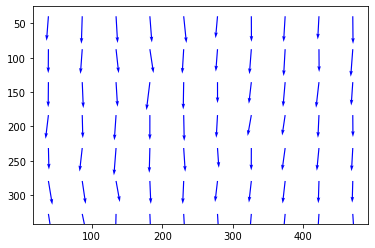

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [7]:


# we can run it from any folder
path = settings.filepath_images


frame_a  = tools.imread( os.path.join(path,settings.frame_pattern_a))
frame_b  = tools.imread( os.path.join(path,settings.frame_pattern_b))

frame_a = (frame_a).astype(np.int32)
frame_b = (frame_b).astype(np.int32)

u, v, sig2noise = process.extended_search_area_piv( frame_a, frame_b, \
    window_size=32, overlap=16, dt=1, search_area_size=64, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, 
                               search_area_size=64, overlap=16 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v, mask = validation.global_val( u, v, (-1000, 2000), (-1000, 1000) )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1)
tools.save(x, y, u, v, sig2noise, mask, 'test1.vec' )
tools.display_vector_field('test1.vec', scale=75, width=0.0035)

In [8]:
#Run the widim

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [369, 511])
('     ', 'total number of iterations', ' | ', 3)
('     ', 'overlap ratio', ' | ', 0.0)
('     ', 'coarse factor', ' | ', 2)
('     ', 'time step', ' | ', 1.0)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 1)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([ 5, 11, 23], dtype=int32))
('     ', 'Ncol', ' | ', array([ 7, 15, 31], dtype=int32))
('     ', 'Window sizes', ' | ', array([64, 32, 16], dtype=int32))
----------------

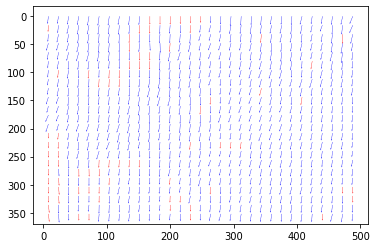

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [9]:
scaling_factor = 1

# we can run it from any folder
path = settings.filepath_images


frame_a  = tools.imread( os.path.join(path,settings.frame_pattern_a))
frame_b  = tools.imread( os.path.join(path,settings.frame_pattern_b))

#no background removal will be performed so 'mark' is initialized to 1 everywhere
mark = np.zeros(frame_a.shape, dtype=np.int32)
for I in range(mark.shape[0]):
    for J in range(mark.shape[1]):
        mark[I,J]=1

#main algorithm
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x,y,u,v, mask=widim.WiDIM( frame_a.astype(np.int32), frame_b.astype(np.int32), mark, min_window_size=16, overlap_ratio=0.0, coarse_factor=2, dt=1, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=1, tolerance=0.7, nb_iter_max=3, sig2noise_method='peak2peak')

#display results
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = scaling_factor )

tools.save(x, y, u, v, u*0, mask, '2image_00.txt' )

tools.display_vector_field('2image_00.txt',widim=True,on_img=False, image_name=os.path.join(path,'../test2/2image_00.tif'), window_size=16, scaling_factor=scaling_factor, scale=200, width=0.001)

#further validation can be performed to eliminate the few remaining wrong vectors